<a href="https://colab.research.google.com/github/raoojashwani/ML_Assignments/blob/main/4Predicting_Insurance_Claim_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV into a DataFrame
df = pd.read_csv("insurance.csv")

# View the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Shape of dataset
print("Shape:", df.shape)

# Data types and null values
print("\nInfo:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
df.describe()

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1338, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Summary Statistics:

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


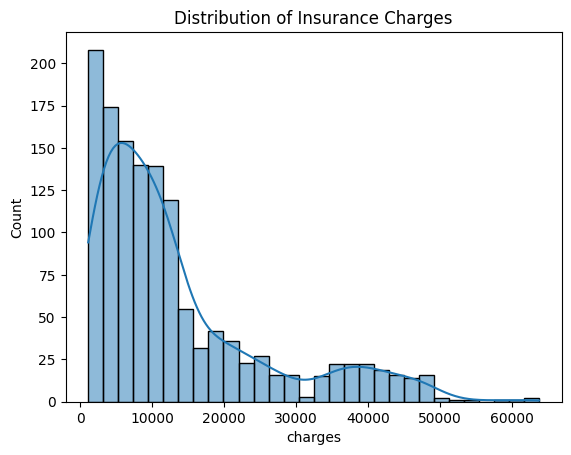

In [ ]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

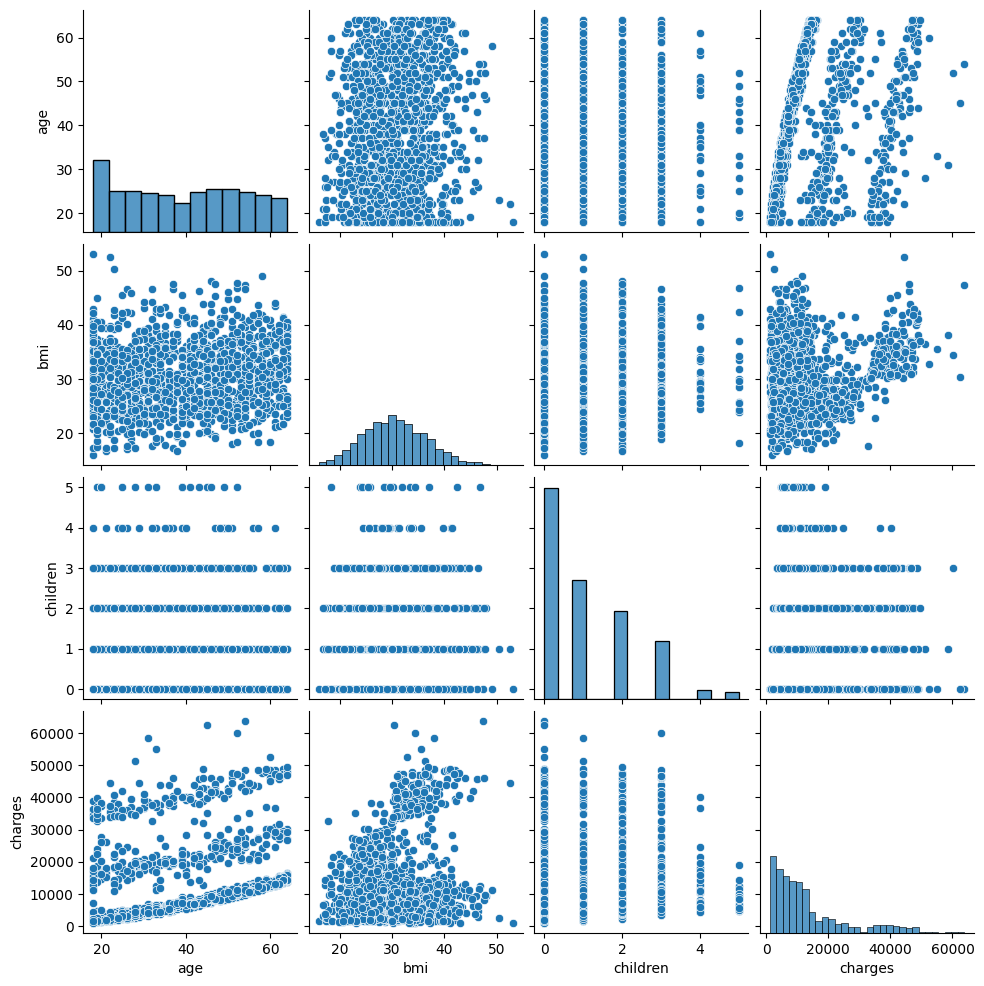

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# Make a copy for visualization (optional)
df_encoded = df.copy()

# Encode all categorical columns
le = LabelEncoder()
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le.fit_transform(df_encoded['region'])

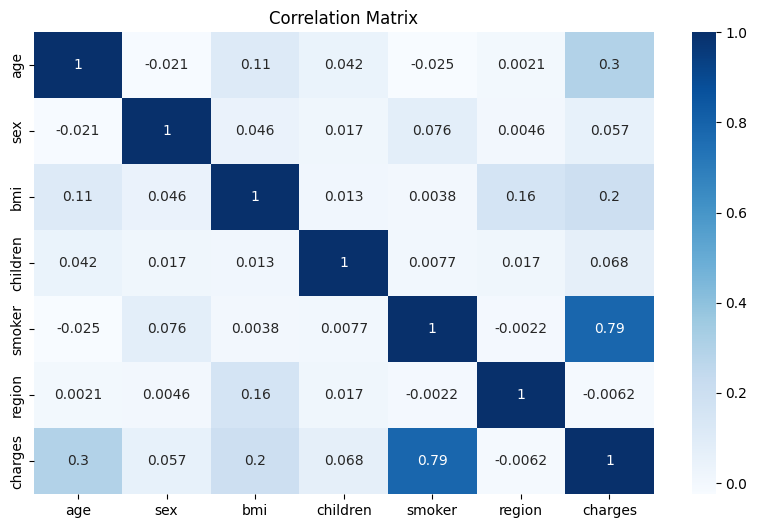

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Check categorical columns
df.select_dtypes(include='object').head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
# Features and Target
X = df.drop('charges', axis=1)
y = df['charges']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred, model_name="Model"):
    print(f"\n--- {model_name} Evaluation ---")
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


--- Linear Regression Evaluation ---
R^2 Score: 0.7833463107364536
Mean Squared Error: 33635210.43117845
Root Mean Squared Error: 5799.5870914383595

--- Random Forest Regressor Evaluation ---
R^2 Score: 0.8658416529065179
Mean Squared Error: 20827913.205296144
Root Mean Squared Error: 4563.760861975148


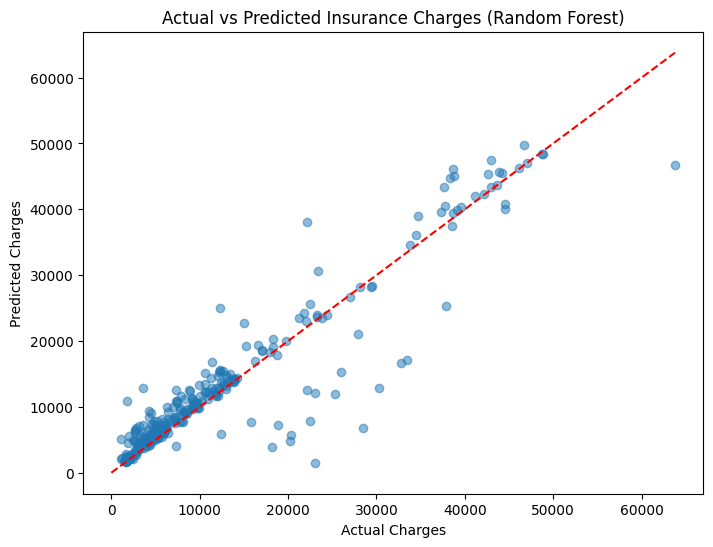

In [ ]:
# Actual vs Predicted (Random Forest)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges (Random Forest)")
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],       # Max depth of trees
    'min_samples_split': [2, 5, 10],   # Min samples required to split
    'min_samples_leaf': [1, 2, 4],     # Min samples required at a leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Features to consider
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Predict
y_pred_rf_best = best_rf_model.predict(X_test)

In [ ]:
# Evaluate the best Random Forest model
evaluate_model(y_test, y_pred_rf_best, "Tuned Random Forest Regressor")


--- Tuned Random Forest Regressor Evaluation ---
R^2 Score: 0.869697219647941
Mean Squared Error: 20229341.359508343
Root Mean Squared Error: 4497.704009770801


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Random Forest Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
Mean Absolute Error: 2514.888056629137
Mean Squared Error: 20827913.205296144
R² Score: 0.8658416529065179


In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
print("Support Vector Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))


Support Vector Regressor:
Mean Absolute Error: 8599.3274179344
Mean Squared Error: 165838925.50171417
R² Score: -0.06821436741015718
